In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [28]:
directoryname = "AGC_test/082625_AGCtest_1dB/"
filename = "082625_AGCtest_"

In [48]:
all_data = np.zeros((41,10,28,8,1024))
#Get all the events
for dB in range(41):
    for eventNum in range(10):
        with open(f"AGC_test/082625_AGCtest_{dB:d}dB/082625_AGCtest_{eventNum:d}.pkl", 'rb') as file:
            theEvent = pickle.load(file)
        data = np.empty((0))
        for i in range(len(theEvent)):
            ## First 8 bytes of each fragments is the header, strip that off (offset = 8) during byte reading and concatenation
            data = np.concatenate((data, np.frombuffer(theEvent[i], dtype = np.int16, offset = 8)))
        # print(len(data))
        ## First 128 bytes of data is more headers, remove it
        data = data[128:]

        ## Reshape to be split into SURF#, Channel#
        data = np.reshape(data, (28, 8, 1024))
        all_data[dB][eventNum] = np.copy(data)


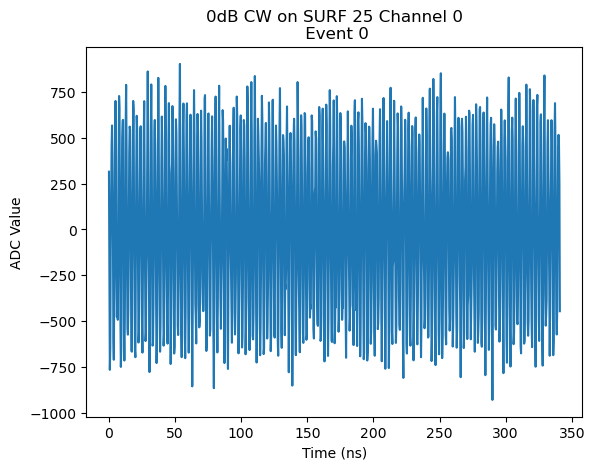

In [62]:
dB_value = 0
event_value = 0
surf_value = 25
channel_value = 0
plt.plot((1/3)*np.arange(len(all_data[dB_value][event_value][surf_value][channel_value])),all_data[dB_value][event_value][surf_value][channel_value])
plt.title(f"{dB_value}dB CW on SURF {surf_value} Channel {channel_value}\n Event {event_value}")
plt.xlabel("Time (ns)")
plt.ylabel("ADC Value")
# plt.xlim(0,100)
plt.show()

In [73]:
agc_pickles = []
for dB_idx in range(40):
    with open(f"AGC_test/082625_AGCtest_{dB_idx:d}dB/jjbAGC.pkl", 'rb') as file:
        agc_pickles.append(pickle.load(file))

In [124]:
scales = {}
chan = 0
for dB_idx in range(39):
    scales[dB_idx] = []
    for i in range(len(agc_pickles[dB_idx])):
        scales[dB_idx].append(agc_pickles[dB_idx][i][chan][4]) # 3 is scale 

In [125]:
mean_scales = []
for idx in range(39):
    mean_scales.append(np.mean(scales[idx]))
    

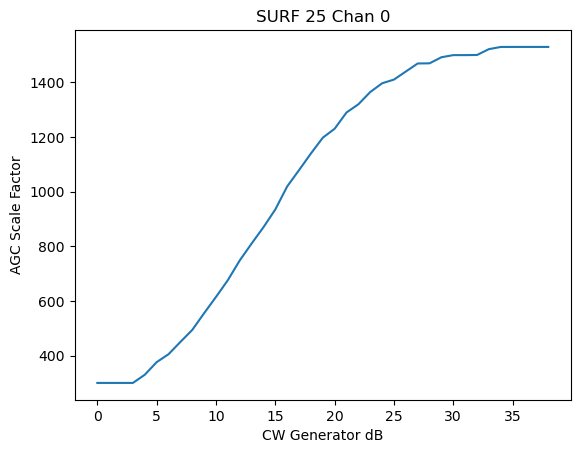

In [126]:
plt.title("SURF 25 Chan 0")
plt.plot(np.arange(39), mean_scales)
plt.xlabel("CW Generator dB")
plt.ylabel("AGC Scale Factor")
plt.show()

In [127]:
dB = 5
scales4 = []
scales5 = []
for chan_idx in range(8):
    scales4.append([])
    scales5.append([])
    for i in range(len(agc_pickles[dB])):
        scales4[chan_idx].append(agc_pickles[dB][i][chan_idx][4])
        scales5[chan_idx].append(agc_pickles[dB][i][chan_idx][9])

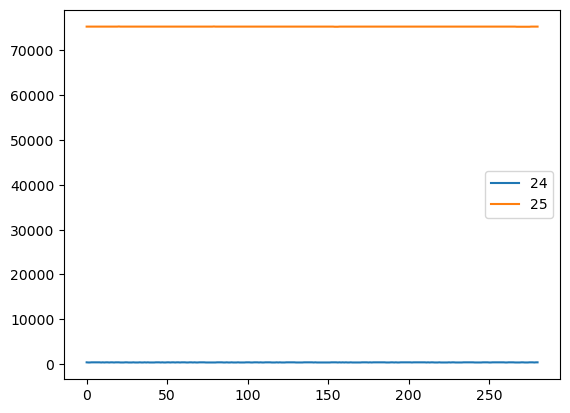

In [128]:
plot_chan = 0
plt.plot(scales4[plot_chan], label="24")
plt.plot(scales5[plot_chan], label="25")
plt.legend()
plt.show()

In [129]:
#  for i in range(8): #loop over channels                                                                                                                                                                                                                          sqr4=surf4.levelone.read(0x4004+0x400*i)/65536
#         gt4=surf4.levelone.read(0x4008+0x400*i)/(65536*8)
#         lt4=surf4.levelone.read(0x400c+0x400*i)/(65536*8)
#         scale4=surf4.levelone.read(0x4010+0x400*i)
#         offset4=surf4.levelone.read(0x4014+0x400*i)
#         done5=surf5.levelone.read(0x4000+0x4004*i)
#         sqr5=surf5.levelone.read(0x4004+0x400*i)/65536
#         gt5=surf5.levelone.read(0x4008+0x400*i)/(65536*8)
#         lt5=surf5.levelone.read(0x400c+0x400*i)/(65536*8)
#         scale5=surf5.levelone.read(0x4010+0x400*i)
#         offset5=surf5.levelone.read(0x4014+0x400*i)
#         thistime.append([i,sqr4,gt4,lt4,scale4,offset4,sqr5,gt5,lt5,scale5,offset5])
#     alltime.append(thistime)